# NAME - SRIKAR PADALIYA
# ID - 202101095


### In this part we are going to do preprocessing on the cleaned data which we stored as form of cleaned.csv file

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
path = "/content/drive/MyDrive/data_mining_project1/cleaned.csv"

In [4]:
df = pd.read_csv(path)

In [5]:
df.columns
df = df.drop(columns = ['Unnamed: 0'])

In [7]:
df.head(7)

,CrimeDate,CrimeTime,CrimeCode,Location,Description,Inside/Outside,Weapon,Post,District,Neighborhood,Location 1,Premise
0,09/02/2017,23:30:00,3JK,4200 AUDREY AVE,ROBBERY - RESIDENCE,I,KNIFE,913.0,SOUTHERN,Brooklyn,"(39.2295100000, -76.6054100000)",ROW/TOWNHO
1,09/02/2017,23:00:00,7A,800 NEWINGTON AVE,AUTO THEFT,O,NO WEAPON,133.0,CENTRAL,Reservoir Hill,"(39.3136000000, -76.6321700000)",STREET
2,09/02/2017,22:53:00,9S,600 RADNOR AV,SHOOTING,O,FIREARM,524.0,NORTHERN,Winston-Govans,"(39.3476800000, -76.6069700000)",Street
3,09/02/2017,22:50:00,4C,1800 RAMSAY ST,AGG. ASSAULT,I,OTHER,934.0,SOUTHERN,Carrollton Ridge,"(39.2831500000, -76.6452600000)",ROW/TOWNHO
4,09/02/2017,22:31:00,4E,100 LIGHT ST,COMMON ASSAULT,O,HANDS,113.0,CENTRAL,Downtown West,"(39.2875600000, -76.6136500000)",STREET
5,09/02/2017,22:00:00,5A,CHERRYCREST RD,BURGLARY,I,NO WEAPON,922.0,SOUTHERN,Cherry Hill,"(39.2486700000, -76.6213100000)",ROW/TOWNHO
6,09/02/2017,21:15:00,1F,3400 HARMONY CT,HOMICIDE,O,FIREARM,232.0,SOUTHEASTERN,Canton,"(39.2820200000, -76.5682700000)",Street


# Preprocessing

In [9]:
feature_list = ["CrimeDate" , "CrimeTime" , "CrimeCode" , "Location" , "Description" , "Inside/Outside" , "Weapon" , "Post" , "District" , "Neighborhood" , "Location 1" ,"Premise" ]
print(feature_list)

['CrimeDate', 'CrimeTime', 'CrimeCode', 'Location', 'Description', 'Inside/Outside', 'Weapon', 'Post', 'District', 'Neighborhood', 'Location 1', 'Premise']


converting time stamp to minutes

In [10]:
def convert(timestamp):
  hour = timestamp[0] + timestamp[1]
  minutes = timestamp[3] + timestamp[4]
  return int(hour)*60 + int(minutes)


applying lambda function to convert all the timestamp to correponding minutes

In [11]:
df[feature_list[1]] = df[feature_list[1]].apply(lambda x : convert(x))

In [34]:
(df['CrimeTime'])

1         1380
3         1370
4         1351
5         1320
8         1260
          ... 
263112       0
263113       0
263114       0
263115       0
263117       0
Name: CrimeTime, Length: 215392, dtype: int64

### Encoding the categorical features

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
le = LabelEncoder()


In [15]:
for ind , col in enumerate(feature_list):
  if(col not in ['CrimeTime']):
    le = LabelEncoder()
    label = le.fit_transform(df[col])
    df[col] = label + 1

In [33]:
(df.head(7))

,CrimeDate,CrimeTime,CrimeCode,Location,Description,Inside/Outside,Weapon,Post,District,Neighborhood,Location 1,Premise
1,1472,1380,61,22481,4,2,4,9,1,215,52656,106
3,1472,1370,40,5265,1,1,5,121,7,38,15312,96
4,1472,1351,42,932,6,2,2,3,1,64,21549,106
5,1472,1320,44,23781,5,1,4,116,7,46,3482,96
8,1472,1260,40,7536,1,2,5,82,5,268,52781,106
9,1472,1260,42,2624,6,1,2,33,2,16,44283,96
10,1472,1260,40,7536,1,2,5,82,5,268,52781,106


### Feature selection


*   we will plot a heatmap of out dataframe to see the correlation between different feature.
*   We can drop those feature with high correlation to avoid the data redundancy.



<Axes: >

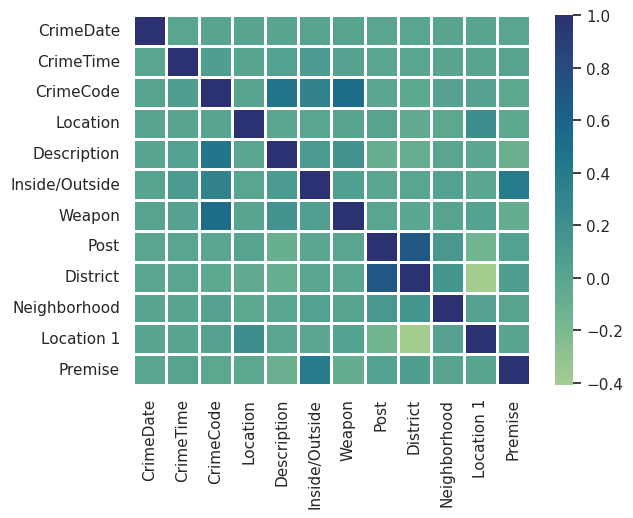

In [32]:

sns.heatmap(df.corr() , lw = 1 , cmap="crest")

It seems like there is no strong correlation between the attributes

### Outliers Detection

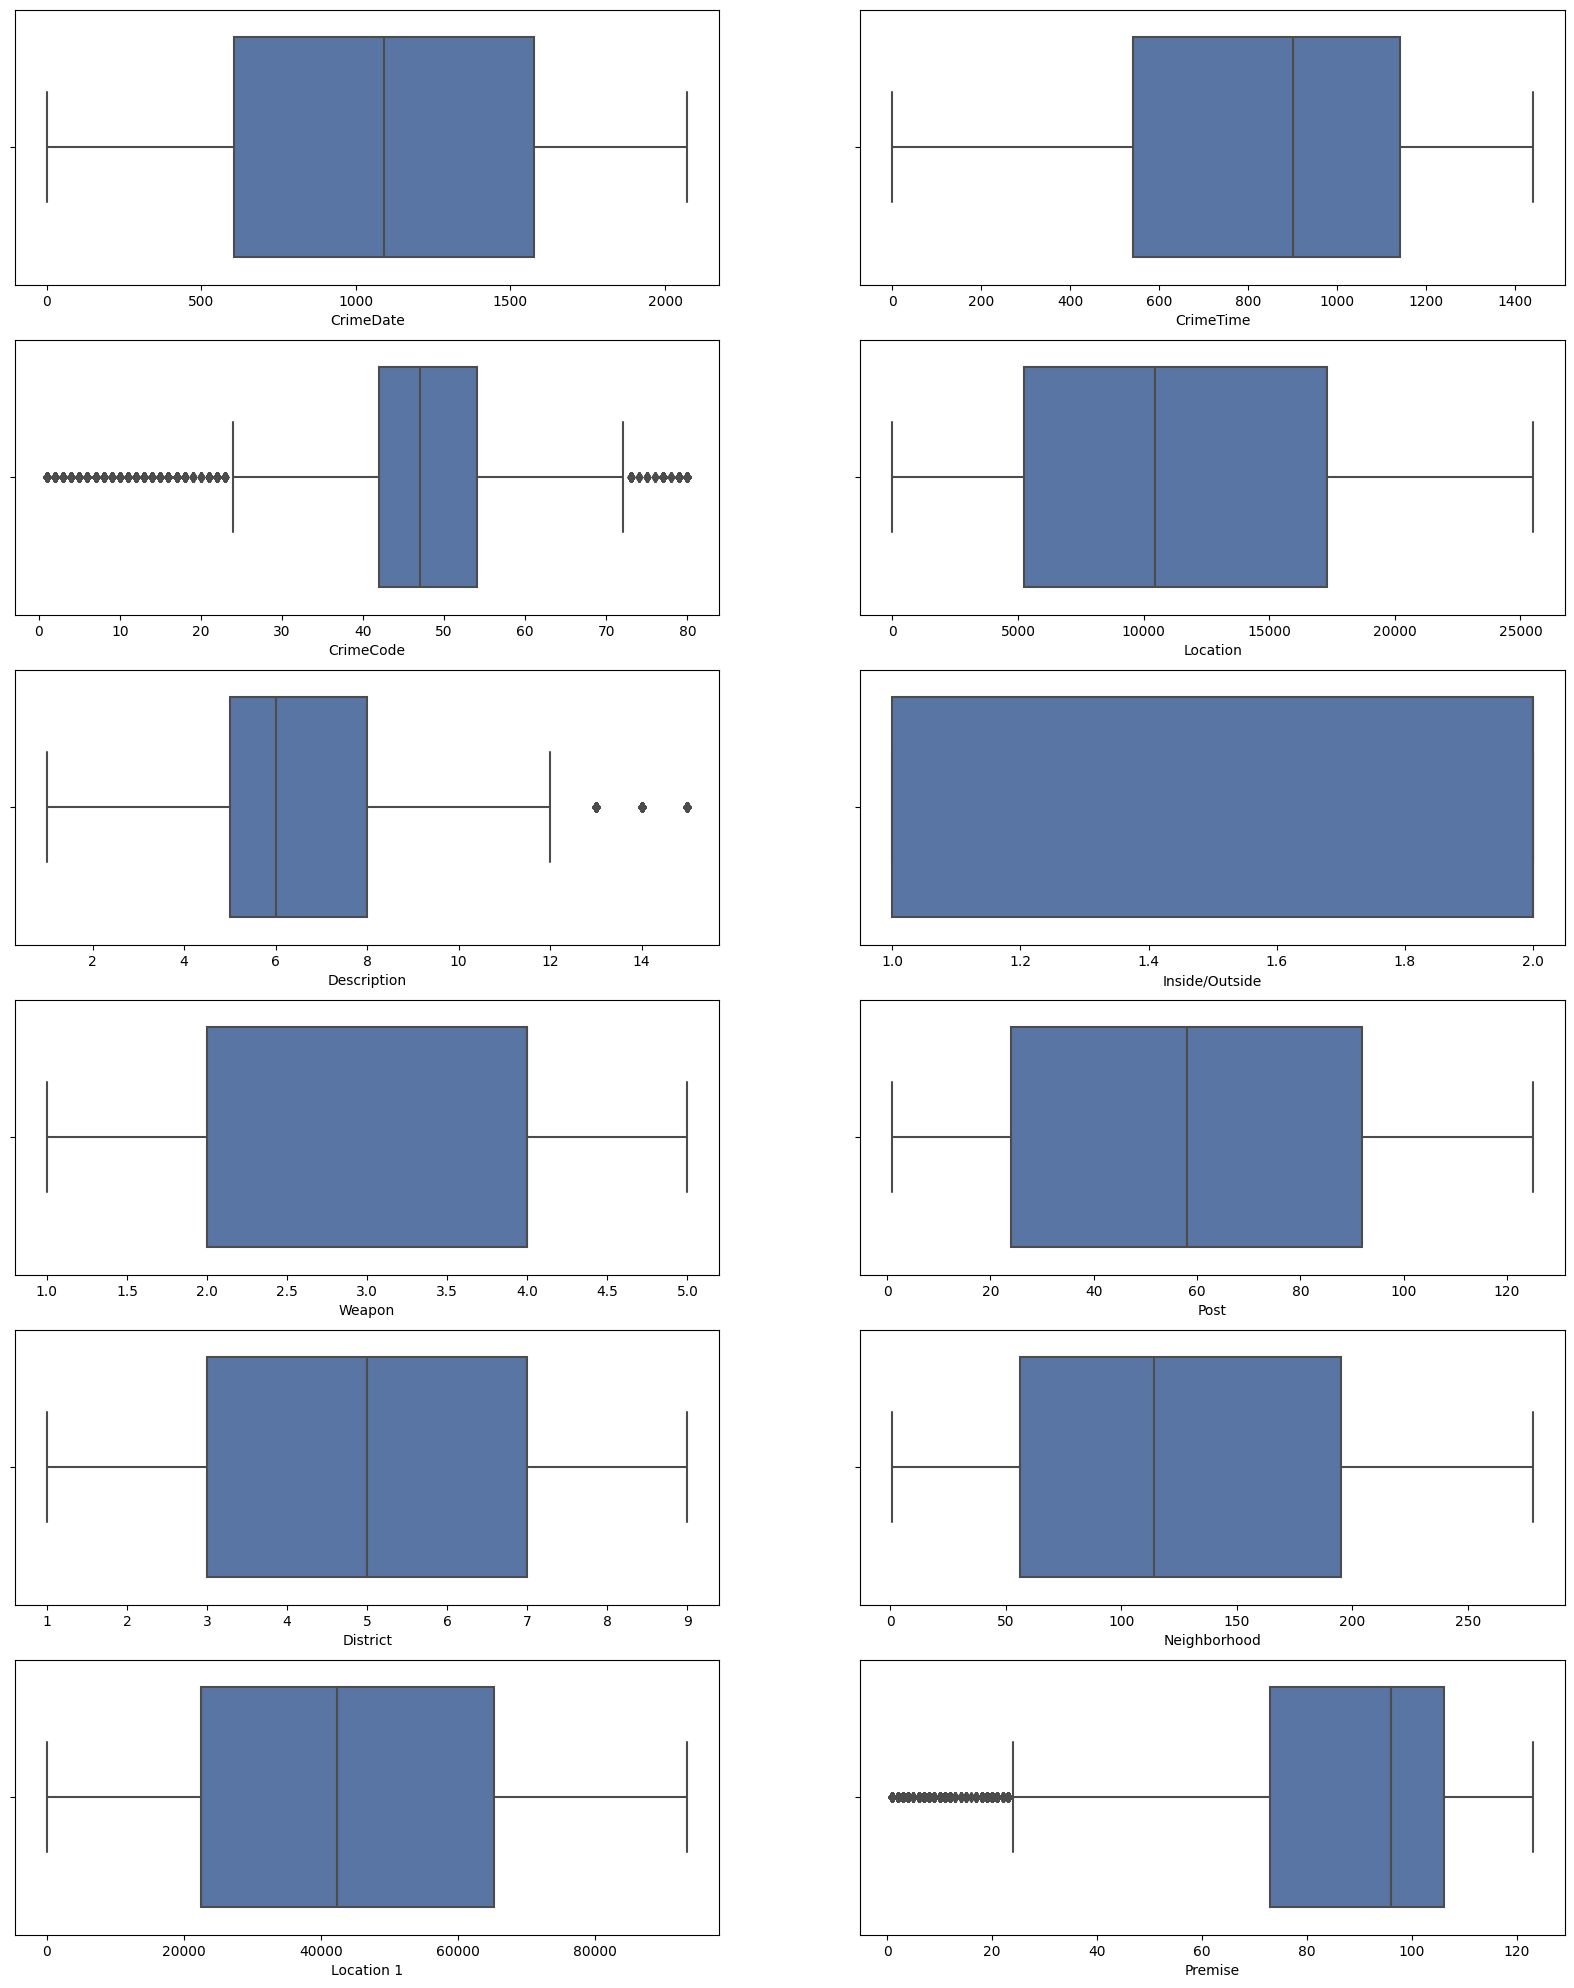

In [18]:
fig, ax = plt.subplots(6 , 2 , figsize=(20, 25))

# flattening the 2D axis into 1D

ax = ax.ravel()

sns.set_theme(style="whitegrid")
for axid, col in enumerate(feature_list):
    sns.boxplot(x=df[col], ax=ax[axid])

we can see there are certain out liers in crime code , premise and description

### Inter Quantile Range

In [19]:
quantile_remove_list = ['Premise' , 'Description' , 'CrimeCode']

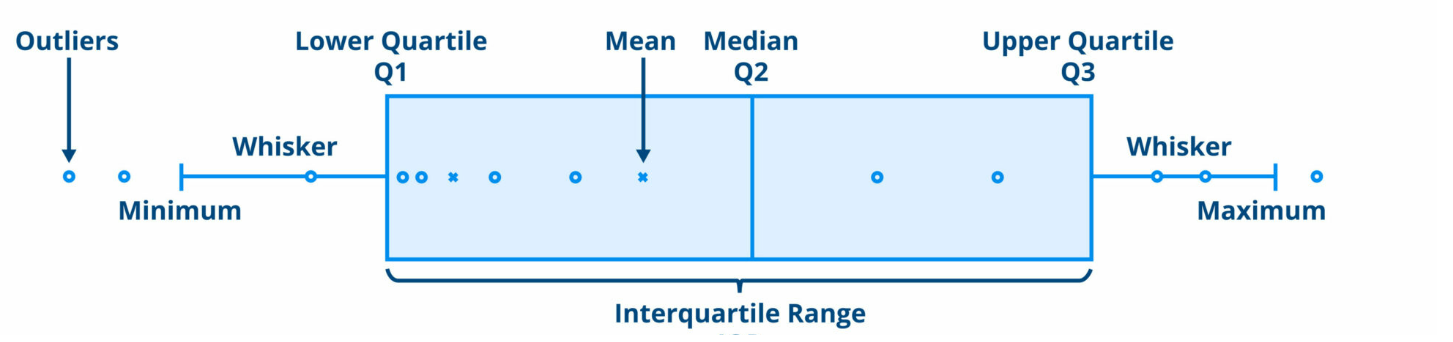

In [20]:
for ind , col in enumerate(quantile_remove_list):
  Q1 = np.percentile(df[col], 25, method='midpoint')
  Q3 = np.percentile(df[col], 75, method='midpoint')
  IRQ = Q3 - Q1
  # upper range is always Q3 + 1.5*IRQ
  # lower range is always Q1 - 1.5*IRQ
  upper_range = Q3 + 1.5*IRQ
  lower_range = Q1 - 1.5*IRQ
  df = df[df[col] >= lower_range]
  df = df[df[col] <= upper_range]

In [21]:
df.shape

(215392, 12)

we are finally left with 215392 instances and 12 columns

# Modeling

### What are we going to predict ?




Based on the following attributes we are going to predict time at which it is not safe to go out in that locality.


*   Crime Description
*   Weapon type
*   Crime category(inside/outside)
*   Crime district



### Model type


* We are going to use ridge regression as regression technique.
* Ridge regression works by adding a penalty term to the cost function, the penalty term being proportional to the sum of the squares of the coefficients. The penalty term is called the L2 norm.


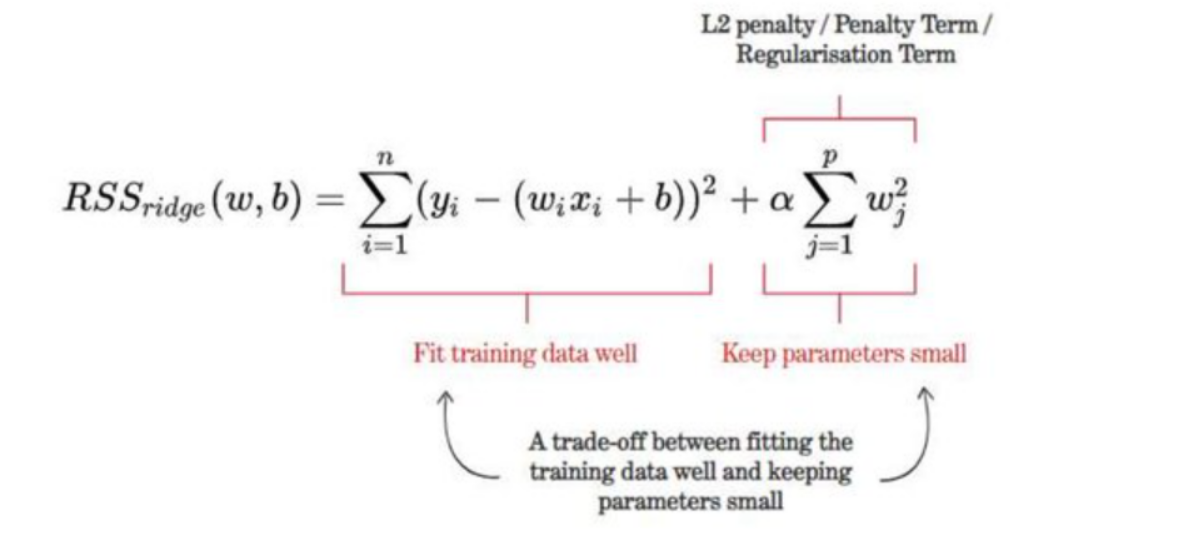
source : vitalflux.com


In [22]:
newdata = df[["Description" , "District" , "Inside/Outside" , "Weapon"]]

In [23]:
newdata.head()

,Description,District,Inside/Outside,Weapon
1,4,1,2,4
3,1,7,1,5
4,6,1,2,2
5,5,7,1,4
8,1,5,2,5


In [24]:
from sklearn.model_selection import train_test_split,GridSearchCV

In [25]:
X_train, X_test, y_train, y_test = train_test_split(newdata, df["CrimeTime"], random_state=42, test_size=0.20)

In [26]:
print(X_train)
print(X_test)
print(y_train)
print(y_test)

        Description  District  Inside/Outside  Weapon
199182            8         3               1       4
128307            5         6               2       4
143498            8         5               1       4
182993            1         2               2       5
242373            8         2               2       4
...             ...       ...             ...     ...
148197            6         6               1       2
128713            4         9               2       4
162481            6         8               1       2
180386            8         5               1       4
150708            9         3               2       4

[172313 rows x 4 columns]
        Description  District  Inside/Outside  Weapon
19427             5         3               1       4
78216             4         5               2       4
84352             9         7               2       4
65947             8         7               1       4
77686             8         2               1       4
.

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled.shape, X_test_scaled.shape

((172313, 4), (43079, 4))

In [29]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [30]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge=Ridge()
parameters={'alpha':[0 , 0.5 , 1 , 2 , 3]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X_train_scaled, list(y_train))

best_model = ridge_regressor.best_estimator_

y_train_predicted = best_model.predict(X_train_scaled)
train_rmse = np.sqrt(mean_squared_error(list(y_train), y_train_predicted))
train_mae = mean_absolute_error(list(y_train), y_train_predicted)

print("Training root mean sqaure error is " , train_rmse )
print("Training mean absolute error is " , train_mae )
print("Best parameters are " , ridge_regressor.best_params_)

y_predicted = best_model.predict(X_test_scaled)
test_rmse = np.sqrt(mean_squared_error(list(y_test), y_predicted))
test_mae = mean_absolute_error(list(y_test), y_predicted)

print("Test root mean sqaure error is " , test_rmse )
print("Test mean absolute error is " , test_mae )

Training root mean sqaure error is  395.5302846741645
Training mean absolute error is  328.3216921596792
Best parameters are  {'alpha': 3}
Test root mean sqaure error is  394.6265930944643
Test mean absolute error is  326.8722482304206


## Conclusion

we can see that training error and testing error are very much in same range which suggests our model has generalised well and not overfitted or underfitted.

*   Train RMSE : 395.530284
*   Test RMSE : 394.626593
*   Train MAE : 328.321692
*   Test MAE : 326.872248
*   Optimal value of alpha : 3

